In [1]:
import cv2
from deepface import DeepFace

#https://zylalabs.com/api-marketplace/tag/face+recognition?utm_source=TSF&utm_medium=Post&utm_campaign=61390&utm_term=150

C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Load the pre-trained model
model = DeepFace.build_model("Emotion")

In [3]:
model.save("emotion.h5")

In [42]:
from tensorflow.keras.models import load_model

model = load_model('emotion.h5')

In [43]:
emotion_labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

In [44]:
# https://github.com/opencv/opencv/tree/master/data/haarcascades 

# Load face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades 
                                + 'haarcascade_frontalface_default.xml')

In [6]:
# Start capturing video
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face ROI (Region of Interest)
        face_roi = gray_frame[y:y + h, x:x + w]

        # Resize the face ROI to match the input shape of the model
        resized_face = cv2.resize(face_roi, (48, 48), interpolation=cv2.INTER_AREA)

        # Normalize the resized face image
        normalized_face = resized_face / 255.0

        # Reshape the image to match the input shape of the model
        reshaped_face = normalized_face.reshape(1, 48, 48, 1)

        # Predict emotions using the pre-trained model
        preds = model.predict(reshaped_face)[0]
        emotion_idx = preds.argmax()
        emotion = emotion_labels[emotion_idx]

        # Draw rectangle around face and label with predicted emotion
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Display the resulting frame
    cv2.imshow('Real-time Emotion Detection', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close all windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


In [7]:
# Start capturing video
cap = cv2.VideoCapture('emotions.mp4') 

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face ROI (Region of Interest)
        face_roi = gray_frame[y:y + h, x:x + w]

        # Resize the face ROI to match the input shape of the model
        resized_face = cv2.resize(face_roi, (48, 48), interpolation=cv2.INTER_AREA)

        # Normalize the resized face image
        normalized_face = resized_face / 255.0

        # Reshape the image to match the input shape of the model
        reshaped_face = normalized_face.reshape(1, 48, 48, 1)

        # Predict emotions using the pre-trained model
        preds = model.predict(reshaped_face)[0]
        emotion_idx = preds.argmax()
        emotion = emotion_labels[emotion_idx]

        # Draw rectangle around face and label with predicted emotion
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Display the resulting frame
    cv2.imshow('Real-time Emotion Detection', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close all windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 0s/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


In [45]:
model_test = DeepFace

In [46]:
import cv2

img = cv2.imread('as_boy.jpg')

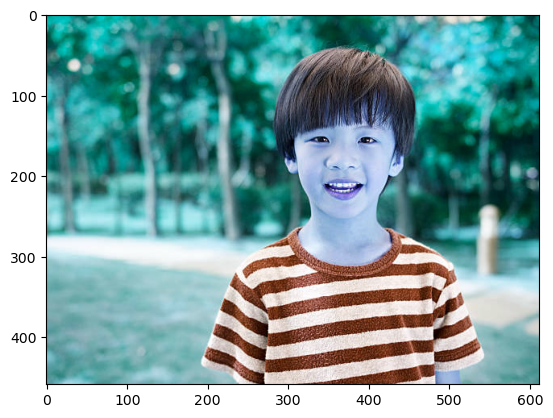

In [47]:
import matplotlib.pyplot as plt

plt.imshow(img)

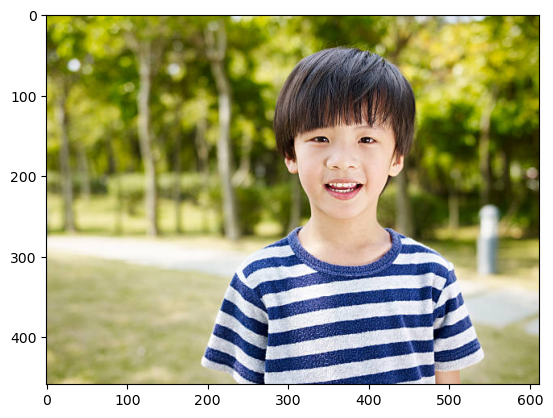

In [48]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [49]:
import numpy as np

# Assuming 'image' is your input image
# Resize the image
resized_image = cv2.resize(img, (48, 48))

# Convert to grayscale
grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)

# Expand dimensions to add the batch size as 1 and channels as 1
input_image = np.expand_dims(grayscale_image, axis=0)
input_image = np.expand_dims(input_image, axis=-1)

# Now, input_image is ready to be fed into the model
prediction = model.predict(input_image)

1/1 [==============================] - 0s 56ms/step


In [50]:
# Handling different types of tasks
if prediction.shape[-1] > 1:  # Classification with multiple classes
    predicted_emotion_index = np.argmax(prediction, axis=-1)
    predicted_emotion_name = emotion_labels[predicted_emotion_index[0]]
else:  # Binary classification or regression
    predicted_value = prediction[0][0]  # Extracting single value
    if is_binary_classification:
        predicted_emotion_name = emotion_labels[int(predicted_value > 0.5)]
    else:
        # For regression, predicted_value is your result
        pass

In [51]:
if prediction.shape[-1] == 1:  # Binary classification or single-class
    predicted_emotion_index = int(prediction > 0.5)  # Applying a threshold for binary classification
    predicted_emotion_name = emotion_labels[predicted_emotion_index]
    print(f"Predicted class: {predicted_class_name}")
else:  # Multi-class classification
    predicted_emotion_index = np.argmax(prediction, axis=-1)
    predicted_emotion_name = emotion_labels[predicted_emotion_index[0]]
    print(f"Predicted class: {predicted_emotion_name}")

Predicted class: happy
